In [ ]:
%cd D:/Documents/SEMESTER 8/EE405 - Undergraduate Project/INR/Playground/Wire Implementation

D:\Documents\SEMESTER 8\EE405 - Undergraduate Project\INR\Playground\Wire Implementation


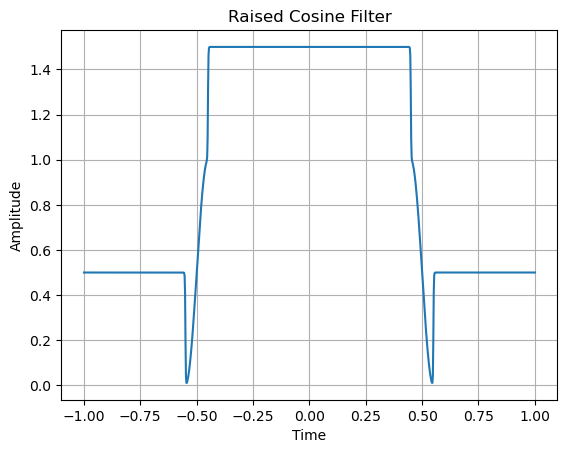

In [1]:
import cv2
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

import torch

from modules.utils import psnr

In [2]:
mat_2 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(2).mat')
mat_3 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(3).mat')
mat_4 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(4).mat')
mat_5 = io.loadmat('./results/denoising/wire.mat')

In [20]:
# mats = [mat_2, mat_3, mat_4]
mats = [mat_2]

In [21]:
mat_2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rec', 'epoch', 'gt', 'im_noisy', 'mse_noisy_array', 'mse_array', 'consts_array', 'time_array'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13232645..1.1212976].


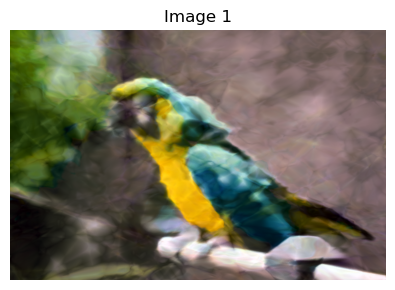

In [22]:
import matplotlib.pyplot as plt

# Create a figure and 4 subplots in a 1x4 grid
fig, axes = plt.subplots(1, len(mats), figsize=(16, 3))
axes = np.atleast_1d(axes)  # Ensure axes is always an array

x = np.arange(2000)

# Example data for each subplot
for i in range(len(mats)):
    axes[i].imshow(mats[i]['rec'], cmap='gray')
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')  # Turn off the axis

# axes[len(mats)].imshow(mats[0]['rec'], cmap='gray')
# axes[len(mats)].set_title('Noisy Image')
# axes[len(mats)].axis('off')  # Turn off the axis

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
mat_5['consts_array'][0][1999]

KeyError: 'consts_array'

In [10]:
psnr(mat_5['gt'], mat_5['rec'])

np.float32(29.65474)